In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import date

In [86]:
appearances_df=pd.read_csv('./dataset/appearances.csv')

In [87]:
# select appearances which competition_id is in [FR1,ES1,GB1,L1,IT1]
appearances_df=appearances_df[appearances_df['competition_id'].isin(['FR1','ES1','GB1','L1','IT1'])]

In [88]:
# select appearances which date bewteen 2021-08-06 and 2022-05-22
appearances_df=appearances_df[(appearances_df['date']>'2021-08-06') & (appearances_df['date']<'2022-05-22')]

In [89]:
# group by player_id to sum yellow_cards and yellow_cards, red_cards, goals, assists, minutes_played
appearances_df=appearances_df.groupby(['player_id']).agg({'yellow_cards':'sum','red_cards':'sum','goals':'sum','assists':'sum','minutes_played':'sum'}).reset_index()

In [90]:
appearances_df

,player_id,yellow_cards,red_cards,goals,assists,minutes_played
0,3333,2,0,0,1,805
1,3455,2,0,8,3,989
2,7093,1,0,0,0,221
3,7161,1,0,12,5,2081
4,7663,0,0,0,1,456
...,...,...,...,...,...,...
2491,880330,0,0,0,0,120
2492,891379,1,0,0,1,85
2493,900909,0,0,0,0,35
2494,917120,1,0,0,0,74


In [91]:
players_df=pd.read_csv('./dataset/players.csv')

In [92]:
# select players have last_season is 2022
players_df=players_df[players_df['last_season']==2022]

In [93]:
# select players which competition_id is in [FR1,ES1,GB1,L1,IT1]
players_df=players_df[players_df['domestic_competition_id'].isin(['FR1','ES1','GB1','L1','IT1'])]

In [94]:
players_df

,player_id,pretty_name,club_id,club_pretty_name,current_club_id,country_of_citizenship,country_of_birth,date_of_birth,position,sub_position,...,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,agent_name,contract_expiration_date,domestic_competition_id,club_name,image_url,last_season,url
19011,212391,Roger Marti,1531,Fc Elche,1531,Spain,Spain,1991-01-03,Attack,Centre-Forward,...,179,2500000.0,10000000.0,Promoesport,2026-06-30,ES1,fc-elche,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/roger-marti/pr...
19013,454238,Tomas Alarcon,2687,Fc Cadiz,2687,Chile,Chile,1999-01-19,Midfield,Defensive Midfield,...,176,3000000.0,3000000.0,TTMIB Worldwide,2025-06-30,ES1,fc-cadiz,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/tomas-alarcon/...
19014,51510,Angel Rodriguez,237,Rcd Mallorca,237,Spain,Spain,1987-04-26,Attack,Centre-Forward,...,171,1000000.0,7500000.0,Emartsoccer,2023-06-30,ES1,rcd-mallorca,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/angel-rodrigue...
19015,213595,Juanjo Narvaez,366,Real Valladolid,366,Colombia,Colombia,1995-02-12,Attack,Centre-Forward,...,181,1200000.0,1500000.0,Wasserman,2025-06-30,ES1,real-valladolid,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/juanjo-narvaez...
19017,36284,Simon Terodde,33,Fc Schalke 04,33,Germany,Germany,1988-03-02,Attack,Centre-Forward,...,192,1000000.0,4000000.0,Sports360 GmbH,2023-06-30,L1,fc-schalke-04,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/simon-terodde/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25536,503991,Yunus Musah,1049,Fc Valencia,1049,United States,United States,2002-11-29,Midfield,Central Midfield,...,178,20000000.0,25000000.0,Football Capital,2026-06-30,ES1,fc-valencia,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/yunus-musah/pr...
25541,502676,Giorgi Mamardashvili,1049,Fc Valencia,1049,Georgia,Georgia,2000-09-29,Goalkeeper,NaN,...,197,25000000.0,25000000.0,Free Football,2027-06-30,ES1,fc-valencia,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/giorgi-mamarda...
25582,195171,Samu Castillejo,1049,Fc Valencia,1049,Spain,Spain,1995-01-18,Attack,Right Winger,...,182,8000000.0,18000000.0,CAA Stellar,2025-06-30,ES1,fc-valencia,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/samu-castillej...
25600,71570,Iago Herrerin,1049,Fc Valencia,1049,Spain,Spain,1988-01-25,Goalkeeper,NaN,...,187,500000.0,4000000.0,NaN,2023-06-30,ES1,fc-valencia,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/iago-herrerin/...


In [95]:
# merge players_df and appearances_df
players_df=pd.merge(players_df,appearances_df,on='player_id',how='left')

In [96]:
players_df

,player_id,pretty_name,club_id,club_pretty_name,current_club_id,country_of_citizenship,country_of_birth,date_of_birth,position,sub_position,...,domestic_competition_id,club_name,image_url,last_season,url,yellow_cards,red_cards,goals,assists,minutes_played
0,212391,Roger Marti,1531,Fc Elche,1531,Spain,Spain,1991-01-03,Attack,Centre-Forward,...,ES1,fc-elche,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/roger-marti/pr...,8.0,0.0,7.0,4.0,2124.0
1,454238,Tomas Alarcon,2687,Fc Cadiz,2687,Chile,Chile,1999-01-19,Midfield,Defensive Midfield,...,ES1,fc-cadiz,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/tomas-alarcon/...,5.0,0.0,0.0,1.0,1417.0
2,51510,Angel Rodriguez,237,Rcd Mallorca,237,Spain,Spain,1987-04-26,Attack,Centre-Forward,...,ES1,rcd-mallorca,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/angel-rodrigue...,4.0,0.0,3.0,3.0,1484.0
3,213595,Juanjo Narvaez,366,Real Valladolid,366,Colombia,Colombia,1995-02-12,Attack,Centre-Forward,...,ES1,real-valladolid,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/juanjo-narvaez...,NaN,NaN,NaN,NaN,NaN
4,36284,Simon Terodde,33,Fc Schalke 04,33,Germany,Germany,1988-03-02,Attack,Centre-Forward,...,L1,fc-schalke-04,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/simon-terodde/...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,503991,Yunus Musah,1049,Fc Valencia,1049,United States,United States,2002-11-29,Midfield,Central Midfield,...,ES1,fc-valencia,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/yunus-musah/pr...,5.0,0.0,1.0,0.0,1236.0
2652,502676,Giorgi Mamardashvili,1049,Fc Valencia,1049,Georgia,Georgia,2000-09-29,Goalkeeper,NaN,...,ES1,fc-valencia,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/giorgi-mamarda...,2.0,0.0,0.0,0.0,1620.0
2653,195171,Samu Castillejo,1049,Fc Valencia,1049,Spain,Spain,1995-01-18,Attack,Right Winger,...,ES1,fc-valencia,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/samu-castillej...,1.0,0.0,0.0,2.0,124.0
2654,71570,Iago Herrerin,1049,Fc Valencia,1049,Spain,Spain,1988-01-25,Goalkeeper,NaN,...,ES1,fc-valencia,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/iago-herrerin/...,NaN,NaN,NaN,NaN,NaN


In [97]:
# drop col = [club_id,current_club_id,country_of_birth,name,highest_market_value_in_gbp,agent_name,contract_expiration_date,club_name,image_url,last_season,url]
players_df=players_df.drop(['club_id','current_club_id','country_of_birth','name','agent_name','club_name','image_url','last_season','url','domestic_competition_id','contract_expiration_date'],axis=1)

In [98]:
players_df

,player_id,pretty_name,club_pretty_name,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,yellow_cards,red_cards,goals,assists,minutes_played
0,212391,Roger Marti,Fc Elche,Spain,1991-01-03,Attack,Centre-Forward,Right,179,2500000.0,10000000.0,8.0,0.0,7.0,4.0,2124.0
1,454238,Tomas Alarcon,Fc Cadiz,Chile,1999-01-19,Midfield,Defensive Midfield,Right,176,3000000.0,3000000.0,5.0,0.0,0.0,1.0,1417.0
2,51510,Angel Rodriguez,Rcd Mallorca,Spain,1987-04-26,Attack,Centre-Forward,Right,171,1000000.0,7500000.0,4.0,0.0,3.0,3.0,1484.0
3,213595,Juanjo Narvaez,Real Valladolid,Colombia,1995-02-12,Attack,Centre-Forward,Right,181,1200000.0,1500000.0,NaN,NaN,NaN,NaN,NaN
4,36284,Simon Terodde,Fc Schalke 04,Germany,1988-03-02,Attack,Centre-Forward,Right,192,1000000.0,4000000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,503991,Yunus Musah,Fc Valencia,United States,2002-11-29,Midfield,Central Midfield,Right,178,20000000.0,25000000.0,5.0,0.0,1.0,0.0,1236.0
2652,502676,Giorgi Mamardashvili,Fc Valencia,Georgia,2000-09-29,Goalkeeper,NaN,Left,197,25000000.0,25000000.0,2.0,0.0,0.0,0.0,1620.0
2653,195171,Samu Castillejo,Fc Valencia,Spain,1995-01-18,Attack,Right Winger,Left,182,8000000.0,18000000.0,1.0,0.0,0.0,2.0,124.0
2654,71570,Iago Herrerin,Fc Valencia,Spain,1988-01-25,Goalkeeper,NaN,Right,187,500000.0,4000000.0,NaN,NaN,NaN,NaN,NaN


In [99]:
players_df.isna().sum()

player_id                        0
pretty_name                      0
club_pretty_name                 0
country_of_citizenship           0
date_of_birth                    0
position                         0
sub_position                   321
foot                            47
height_in_cm                     0
market_value_in_gbp              4
highest_market_value_in_gbp      1
yellow_cards                   830
red_cards                      830
goals                          830
assists                        830
minutes_played                 830
dtype: int64

In [100]:
# if sub_position is not null, then position = sub_position
players_df['position']=np.where(players_df['sub_position'].isna(),players_df['position'],players_df['sub_position'])

In [101]:
# drop col = [sub_position]
players_df=players_df.drop(['sub_position'],axis=1)

In [105]:
# if Foot is null, then Foot = 'Right'
players_df['foot']=np.where(players_df['foot'].isna(),'Right',players_df['foot'])

In [107]:
# drop player who have no minutes_played
players_df=players_df[players_df['minutes_played']>0]

In [109]:
# drop player who have no market_value_in_gbp
players_df=players_df[players_df['market_value_in_gbp']>0]

In [102]:
players_df

,player_id,pretty_name,club_pretty_name,country_of_citizenship,date_of_birth,position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,yellow_cards,red_cards,goals,assists,minutes_played
0,212391,Roger Marti,Fc Elche,Spain,1991-01-03,Centre-Forward,Right,179,2500000.0,10000000.0,8.0,0.0,7.0,4.0,2124.0
1,454238,Tomas Alarcon,Fc Cadiz,Chile,1999-01-19,Defensive Midfield,Right,176,3000000.0,3000000.0,5.0,0.0,0.0,1.0,1417.0
2,51510,Angel Rodriguez,Rcd Mallorca,Spain,1987-04-26,Centre-Forward,Right,171,1000000.0,7500000.0,4.0,0.0,3.0,3.0,1484.0
3,213595,Juanjo Narvaez,Real Valladolid,Colombia,1995-02-12,Centre-Forward,Right,181,1200000.0,1500000.0,NaN,NaN,NaN,NaN,NaN
4,36284,Simon Terodde,Fc Schalke 04,Germany,1988-03-02,Centre-Forward,Right,192,1000000.0,4000000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,503991,Yunus Musah,Fc Valencia,United States,2002-11-29,Central Midfield,Right,178,20000000.0,25000000.0,5.0,0.0,1.0,0.0,1236.0
2652,502676,Giorgi Mamardashvili,Fc Valencia,Georgia,2000-09-29,Goalkeeper,Left,197,25000000.0,25000000.0,2.0,0.0,0.0,0.0,1620.0
2653,195171,Samu Castillejo,Fc Valencia,Spain,1995-01-18,Right Winger,Left,182,8000000.0,18000000.0,1.0,0.0,0.0,2.0,124.0
2654,71570,Iago Herrerin,Fc Valencia,Spain,1988-01-25,Goalkeeper,Right,187,500000.0,4000000.0,NaN,NaN,NaN,NaN,NaN


In [110]:
players_df.isna().sum()

player_id                      0
pretty_name                    0
club_pretty_name               0
country_of_citizenship         0
date_of_birth                  0
position                       0
foot                           0
height_in_cm                   0
market_value_in_gbp            0
highest_market_value_in_gbp    0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
dtype: int64

In [111]:
# read clubs_rank_2021_2022.csv
clubs_rank_df=pd.read_csv('./clubs_rank_2021_2022.csv', sep='\t')

In [112]:
# replace club_pretty_name by rank in clubs_rank_df if it not exist, then replace by 20
players_df['club_rank']=players_df['club_pretty_name'].map(clubs_rank_df.set_index('club_pretty_name')['rank']).fillna(20)

In [113]:
# calculate age
players_df['age']=players_df['date_of_birth'].apply(lambda x: date.today().year-int(x.split('-')[0]))

In [114]:
players_df.columns

Index(['player_id', 'pretty_name', 'club_pretty_name',
       'country_of_citizenship', 'date_of_birth', 'position', 'foot',
       'height_in_cm', 'market_value_in_gbp', 'highest_market_value_in_gbp',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'club_rank', 'age'],
      dtype='object')

In [115]:
# replace player with height_in_cm = 0 by median of height_in_cm
players_df['height_in_cm']=np.where(players_df['height_in_cm']==0,players_df['height_in_cm'].median(),players_df['height_in_cm'])

In [117]:
# set index = player_id
players_df=players_df.set_index('player_id')

In [118]:
players_df.describe()

,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,yellow_cards,red_cards,goals,assists,minutes_played,club_rank,age
count,1824.000000,1.824000e+03,1.824000e+03,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000
mean,182.746711,1.295696e+07,2.155007e+07,3.363487,0.077303,2.349781,1.852522,1608.922149,9.170504,26.882127
std,6.580735,1.694815e+07,2.369217e+07,2.830754,0.279193,3.688713,2.492922,911.563237,5.304030,4.310854
min,163.000000,5.000000e+04,1.750000e+05,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,17.000000
25%,178.000000,2.500000e+06,6.000000e+06,1.000000,0.000000,0.000000,0.000000,858.000000,5.000000,24.000000
50%,183.000000,6.500000e+06,1.500000e+07,3.000000,0.000000,1.000000,1.000000,1647.000000,9.000000,27.000000
75%,187.000000,1.700000e+07,2.800000e+07,5.000000,0.000000,3.000000,3.000000,2344.250000,13.000000,30.000000
max,202.000000,1.700000e+08,2.000000e+08,16.000000,2.000000,35.000000,21.000000,3420.000000,20.000000,41.000000


In [121]:
players_df.columns

Index(['pretty_name', 'club_pretty_name', 'country_of_citizenship',
       'date_of_birth', 'position', 'foot', 'height_in_cm',
       'market_value_in_gbp', 'highest_market_value_in_gbp', 'yellow_cards',
       'red_cards', 'goals', 'assists', 'minutes_played', 'club_rank', 'age'],
      dtype='object')

<AxesSubplot: xlabel='age', ylabel='Count'>

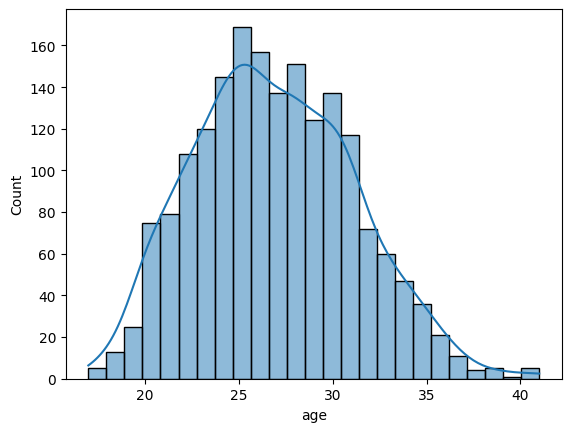

In [127]:
import seaborn as sns
# Biến dạng số: age, height_in_cm, market_value_in_gbp, minutes_played, goals, assists, yellow_cards, red_cards, club_rank, highest_market_value_in_gbp
# Biến dạng phân loại: position, foot, club_rank, country_of_citizenship

# Phân tích biến dạng số với seaborn
# age
sns.histplot(players_df['age'], kde=True)


<AxesSubplot: xlabel='height_in_cm', ylabel='Count'>

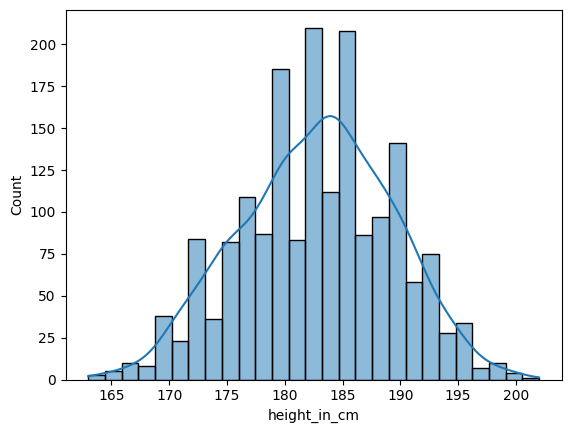

In [128]:
# height_in_cm
sns.histplot(players_df['height_in_cm'], kde=True)

<AxesSubplot: xlabel='market_value_in_gbp', ylabel='Count'>

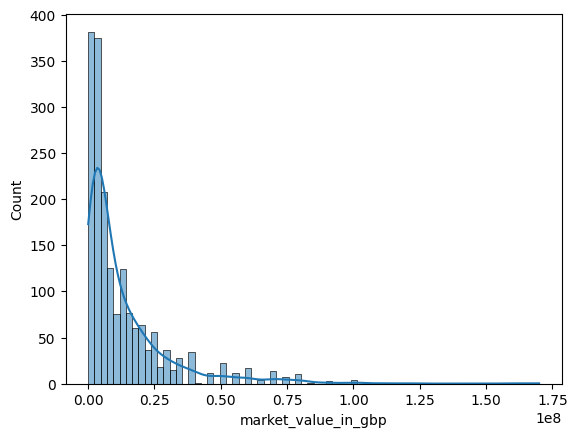

In [129]:
# market_value_in_gbp
sns.histplot(players_df['market_value_in_gbp'], kde=True)

<AxesSubplot: xlabel='minutes_played', ylabel='Count'>

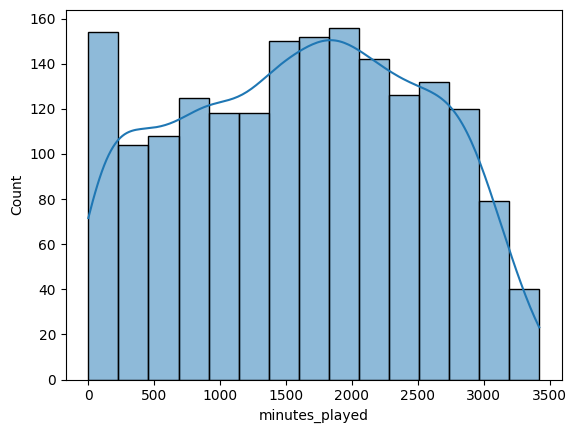

In [130]:
# minutes_played
sns.histplot(players_df['minutes_played'], kde=True)

<AxesSubplot: xlabel='goals', ylabel='Count'>

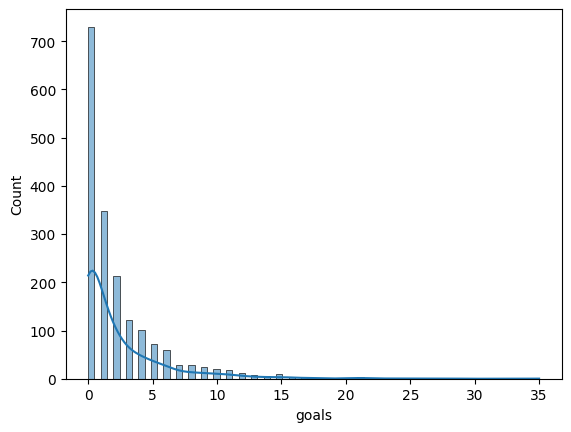

In [131]:
# goals
sns.histplot(players_df['goals'], kde=True)

<AxesSubplot: xlabel='assists', ylabel='Count'>

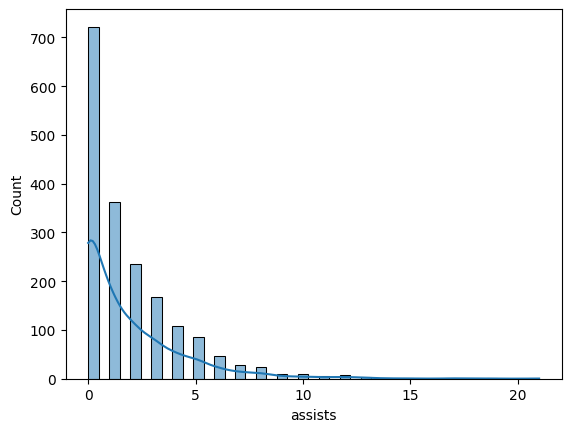

In [132]:
# assists
sns.histplot(players_df['assists'], kde=True)

<AxesSubplot: xlabel='yellow_cards', ylabel='Count'>

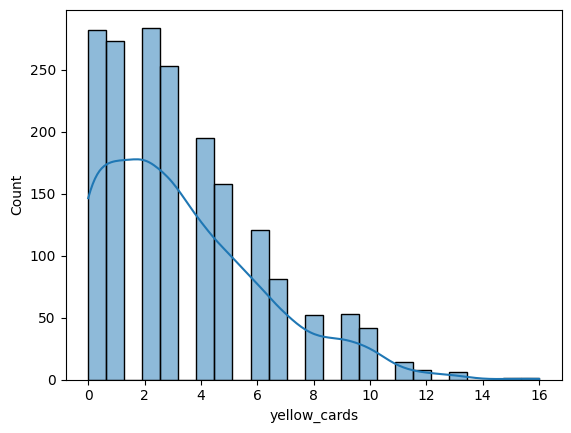

In [133]:
# yellow_cards
sns.histplot(players_df['yellow_cards'], kde=True)

<AxesSubplot: xlabel='red_cards', ylabel='Count'>

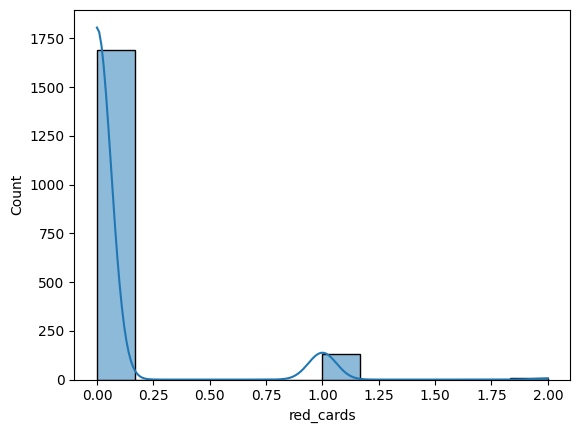

In [134]:
# red_cards
sns.histplot(players_df['red_cards'], kde=True)

<AxesSubplot: ylabel='position'>

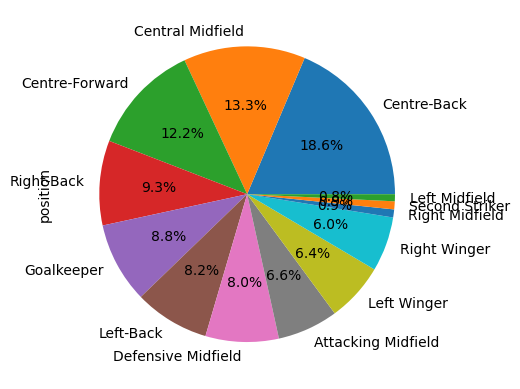

In [138]:
# Phân tích biến dạng phân loại với seaborn
# position
# use pie chart
players_df['position'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot: ylabel='foot'>

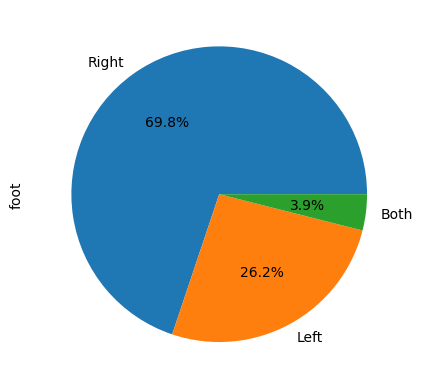

In [139]:
# foot
# use pie chart
players_df['foot'].value_counts().plot.pie(autopct='%1.1f%%')

C:\Users\kienv\AppData\Local\Temp\ipykernel_17152\4141713928.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(players_df.corr(),annot=True)


<AxesSubplot: >

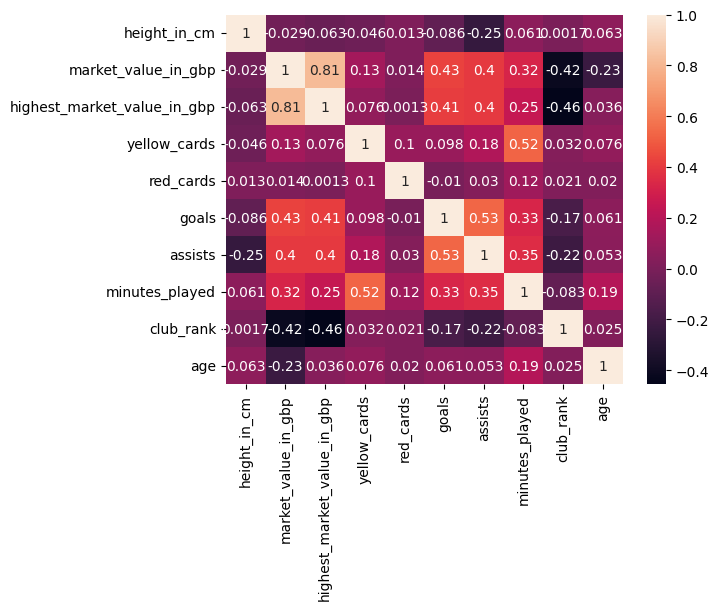

In [149]:
# correlation with seaborn
sns.heatmap(players_df.corr(),annot=True)

In [146]:
# apply model for both numerical and categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# numerical data
numerical_data=['age','height_in_cm','minutes_played','goals','assists','yellow_cards','red_cards','highest_market_value_in_gbp']

# categorical data
categorical_data=['position','foot','club_rank','country_of_citizenship']

# predict data
predict_data=['market_value_in_gbp']

# create pipeline for numerical data
numerical_transformer=Pipeline(steps=[
    ('scaler',StandardScaler())
])

# create pipeline for categorical data
categorical_transformer=Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

# create pipeline for both numerical and categorical data
preprocessor=ColumnTransformer(transformers=[
    ('num',numerical_transformer,numerical_data),
    ('cat',categorical_transformer,categorical_data)
])

# create pipeline for model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Linear Regression
model1=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])

# Random Forest
model2=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor())
])

# Decision Tree
model3=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',DecisionTreeRegressor())
])

# apply model
X=players_df[numerical_data+categorical_data]
y=players_df[predict_data]

# split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# fit model
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

# predict
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=model3.predict(X_test)


c:\Users\kienv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\pipeline.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [147]:

# evaluate model
print('Linear Regression')
print('Mean squared error: %.2f'%mean_squared_error(y_test,y_pred1))
print('Coefficient of determination: %.2f'%r2_score(y_test,y_pred1))

print('Random Forest')
print('Mean squared error: %.2f'%mean_squared_error(y_test,y_pred2))
print('Coefficient of determination: %.2f'%r2_score(y_test,y_pred2))

print('Decision Tree')
print('Mean squared error: %.2f'%mean_squared_error(y_test,y_pred3))
print('Coefficient of determination: %.2f'%r2_score(y_test,y_pred3))

Linear Regression
Mean squared error: 60329826119648.63
Coefficient of determination: 0.78
Random Forest
Mean squared error: 38377184780136.98
Coefficient of determination: 0.86
Decision Tree
Mean squared error: 122851897260273.97
Coefficient of determination: 0.55
